In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib.ticker as mticker

from matplotlib.dates import DateFormatter
from datetime import timedelta

billboard_hot_100 = pd.read_csv("../billboard_hot_100.csv")
billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],
                                                            infer_datetime_format=True)

In [2]:
billboard_hot_100["year"] = billboard_hot_100["first_day_of_the_week"].dt.year
billboard_hot_100["max_weeks_on_chart"] = billboard_hot_100.groupby(["artist", "song_name"])["weeks_on_chart"].transform("max")
billboard_hot_100["top_position"] = billboard_hot_100.groupby(["artist", "song_name"])["position"].transform("min")

In [3]:
# MTV Launch date
mtv_launch_date = pd.to_datetime("1981-08-01", infer_datetime_format=True)

# Spotify creation date
spotify_creation_date = pd.to_datetime("2008-01-01", infer_datetime_format=True)

# Youtube creation date
youtube_creation_date = pd.to_datetime("2005-02-14", infer_datetime_format=True)

# Apple music creation date
apple_music_creation_date = pd.to_datetime("2015-06-30", infer_datetime_format=True)

# CDs creation date
cds_creation_date = pd.to_datetime("1982-08-17", infer_datetime_format=True)

# MP3 creation date
mp3_creation_date = pd.to_datetime("1991-12-01", infer_datetime_format=True)

# iTunes release date
itunes_creation_date = pd.to_datetime("2001-01-09", infer_datetime_format=True)

# Cassettes creation date
cassettes_creation_date = pd.to_datetime("1963-08-30", infer_datetime_format=True)

In [4]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Songs statistics

### Songs lifetime on chart

In [5]:
billboard_hot_100_subset = billboard_hot_100[["artist", "song_name", "year", "max_weeks_on_chart"]].drop_duplicates()

In [6]:
from scipy.stats import median_abs_deviation

def std_error_of_median(data):
    mad = median_abs_deviation(data)
    std_median = mad / np.sqrt(len(data))
    return std_median

In [7]:
avg_week_on_chart_yearly = billboard_hot_100_subset[["max_weeks_on_chart", "year"]].groupby(by="year").mean()
std_error = billboard_hot_100_subset[["year", "max_weeks_on_chart"]].groupby(by="year").sem()

median_weeks_on_chart_yearly = billboard_hot_100_subset[["max_weeks_on_chart", "year"]].groupby(by="year").median()
median_std_error = billboard_hot_100_subset[["year", "max_weeks_on_chart"]].groupby(by="year")["max_weeks_on_chart"].apply(
    std_error_of_median).rename("max_weeks_on_chart")

twntieth_weeks_on_chart_yearly = billboard_hot_100_subset[["max_weeks_on_chart", "year"]].groupby(by="year").quantile(0.2)

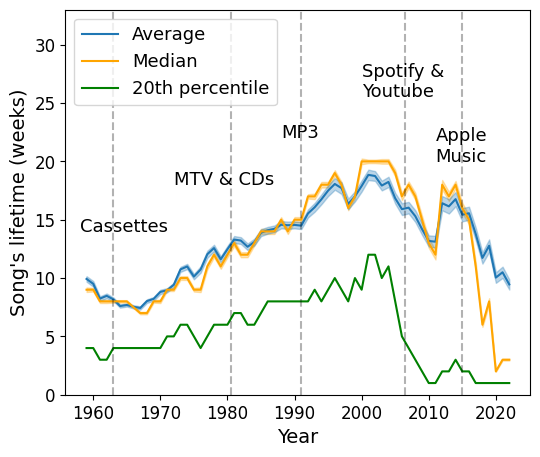

In [8]:
avg_weeks_on_chart_plot_yearly = avg_week_on_chart_yearly.plot(kind='line', figsize=(6, 5), legend=False)
median_weeks_on_chart_yearly.plot(kind='line', figsize=(6, 5), legend=False,
    ax=avg_weeks_on_chart_plot_yearly, color="orange")
twntieth_weeks_on_chart_yearly.plot(kind='line', figsize=(6, 5), legend=False,
    ax=avg_weeks_on_chart_plot_yearly, color="green")

median_fill = avg_weeks_on_chart_plot_yearly.fill_between(median_weeks_on_chart_yearly.index, median_weeks_on_chart_yearly["max_weeks_on_chart"].values - median_std_error.values,
                    median_weeks_on_chart_yearly["max_weeks_on_chart"].values + median_std_error.values, alpha=0.3, color="orange")
avg_fill = avg_weeks_on_chart_plot_yearly.fill_between(avg_week_on_chart_yearly.index, avg_week_on_chart_yearly["max_weeks_on_chart"] - std_error["max_weeks_on_chart"],
                    avg_week_on_chart_yearly["max_weeks_on_chart"] + std_error["max_weeks_on_chart"], alpha=0.3, color="C0")

avg_weeks_on_chart_plot_yearly.axvline(x = youtube_creation_date.year + ((spotify_creation_date.year - youtube_creation_date.year)/2),
                                color='black', ls="dashed", alpha=0.3)
avg_weeks_on_chart_plot_yearly.axvline(x = apple_music_creation_date.year, color='black', ls="dashed", alpha=0.3)
avg_weeks_on_chart_plot_yearly.axvline(x = mtv_launch_date.year + ((mtv_launch_date.year - cds_creation_date.year)/2), color='black',
                                ls="dashed", alpha=0.3)
avg_weeks_on_chart_plot_yearly.axvline(x = mp3_creation_date.year, color='black', ls="dashed", alpha=0.3)
avg_weeks_on_chart_plot_yearly.axvline(x = cassettes_creation_date.year, color="black", ls="dashed", alpha=0.3)

plt.text(youtube_creation_date.year - 5, 25.5, "Spotify &\nYoutube", fontsize=13)
plt.text(apple_music_creation_date.year - 4, 20, "Apple\nMusic", fontsize=13)
plt.text(mtv_launch_date.year - 9, 18, "MTV & CDs", fontsize=13)
plt.text(mp3_creation_date.year - 3, 22, "MP3", fontsize=13)
plt.text(cassettes_creation_date.year - 5, 14, "Cassettes", fontsize=13)

plt.xlabel("Year")
plt.ylabel("Song's lifetime (weeks)")
plt.legend(["Average", "Median", "20th percentile"], loc="upper left", fontsize=13)
plt.ylim([0, 33])

# plt.savefig("figures/average_weeks_on_chart_yearly.pdf", format="pdf")
plt.show()

### Average lifetime per decade

In [9]:
def get_decade(year):
    return year - year % 10

billboard_hot_100["decade"] = billboard_hot_100["year"].apply(get_decade).astype(str) + "s"

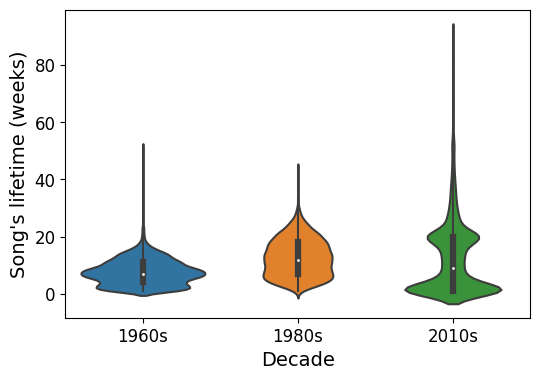

In [10]:
plt.figure(figsize=(6, 4))

billboard_hot_100_subset = billboard_hot_100[["artist", "song_name", "decade", "max_weeks_on_chart"]].drop_duplicates()
sns.violinplot(x='decade', y="max_weeks_on_chart", order=[str(decade) + "s" for decade in [1960, 1980, 2010]], data=billboard_hot_100_subset)

plt.xlabel("Decade")
plt.ylabel("Song's lifetime (weeks)")

# plt.savefig("figures/lifeftime_distribution_per_decade.pdf", format="pdf", bbox_inches='tight')
plt.show()

### Average weeks on the chart before and after reaching the top position

In [11]:
def get_past_weeks(row):
    top_position = row["top_position"].iloc[0]
    # take first day of the week when the song was in top position
    top_position_time = row[
        (row["position"] == top_position)]["first_day_of_the_week"].values[0]
    past_weeks = row[
        (row["first_day_of_the_week"] <= top_position_time)]["weeks_on_chart"].max()
    return past_weeks

df_past_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
    lambda row: get_past_weeks(row)).rename("past_weeks").reset_index()

billboard_hot_100 = billboard_hot_100.merge(df_past_weeks[["artist", "song_name", "past_weeks"]], on=["artist", "song_name"], how="left")

def get_future_weeks(row):
    top_position = row["top_position"].iloc[0]
    past_weeks = row["past_weeks"].iloc[0]
    # take first day of the week when the song was in top position
    top_position_time = row[
        (row["position"] == top_position)]["first_day_of_the_week"].values[0]
    max_weeks = row[
        (row["first_day_of_the_week"] > top_position_time)]["weeks_on_chart"].max()
    if max_weeks is np.nan or max_weeks == 0:
        return 0
    future_weeks = max_weeks - past_weeks
    if future_weeks is np.nan or future_weeks < 0:
        return 0
    return future_weeks

df_future_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
    lambda row: get_future_weeks(row)).rename("future_weeks").reset_index()

billboard_hot_100 = billboard_hot_100.merge(df_future_weeks[["artist", "song_name", "future_weeks"]], on=["artist", "song_name"], how="left")

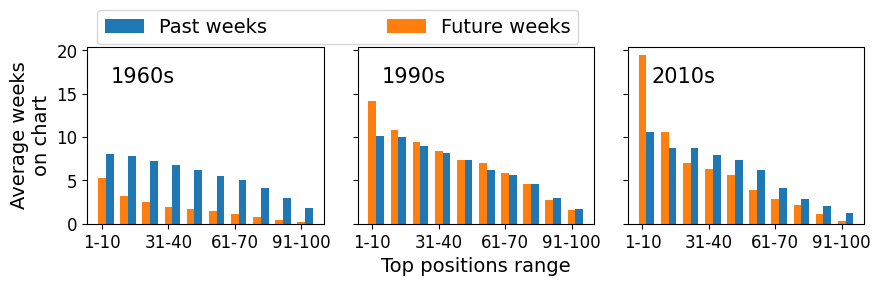

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=True, sharex=True)

col_i = 0

for year in [1960, 1990, 2010]:
    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

    # take songs only from this decade
    songs_in_decade = billboard_hot_100[~(billboard_hot_100["artist"].isin(songs_from_other_decades["artist"]) &\
            billboard_hot_100["song_name"].isin(songs_from_other_decades["song_name"]))]
    
    top_positions_max = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    top_positions_future = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    top_positions_past = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    for top_position in range(10, 110, 10):
        avg_max_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["max_weeks_on_chart"].first().mean()
        new_row_max = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_max_weeks}, index=[0])
        top_positions_max = pd.concat([top_positions_max, new_row_max])

        avg_future_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["future_weeks"].first().mean()
        new_row_future = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_future_weeks}, index=[0])
        top_positions_future = pd.concat([top_positions_future, new_row_future])

        avg_past_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["past_weeks"].first().mean()
        new_row_past = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_past_weeks}, index=[0])
        top_positions_past = pd.concat([top_positions_past, new_row_past])

    ind = np.arange(top_positions_max["top_positions_range"].shape[0])
    # bar_width = 0.24
    bar_width = 0.35
    # axes[row_i, col_i].bar(ind, top_positions_max["avg_weeks"], bar_width, label="Max weeks")
    axes[col_i].bar(ind + 2*bar_width, top_positions_past["avg_weeks"], bar_width, label="Past weeks")
    axes[col_i].bar(ind + bar_width, top_positions_future["avg_weeks"], bar_width, label="Future weeks")
    axes[col_i].text(0.1, 0.8, f"{year}s", fontsize=15, transform=axes[col_i].transAxes)
    if col_i == 1:
        axes[col_i].set_xlabel("Top positions range")
    if col_i == 0:
        axes[col_i].set_ylabel("Average weeks\non chart")
    axes[col_i].xaxis.set_major_locator(plt.MaxNLocator(5))
    axes[col_i].set_xticks(ind[::3] + bar_width, top_positions_max["top_positions_range"].tolist()[::3])
    if col_i == 0:
        axes[col_i].legend(fontsize=14, loc="lower left", bbox_to_anchor=(0, 0.96, 2.12, 0.2), ncols=3, mode="expand")

    col_i += 1

fig.tight_layout()
# plt.savefig("figures/average_weeks_on_chart_per_top_position_decades.pdf", format="pdf", bbox_inches='tight')
plt.show()

### Plot all together

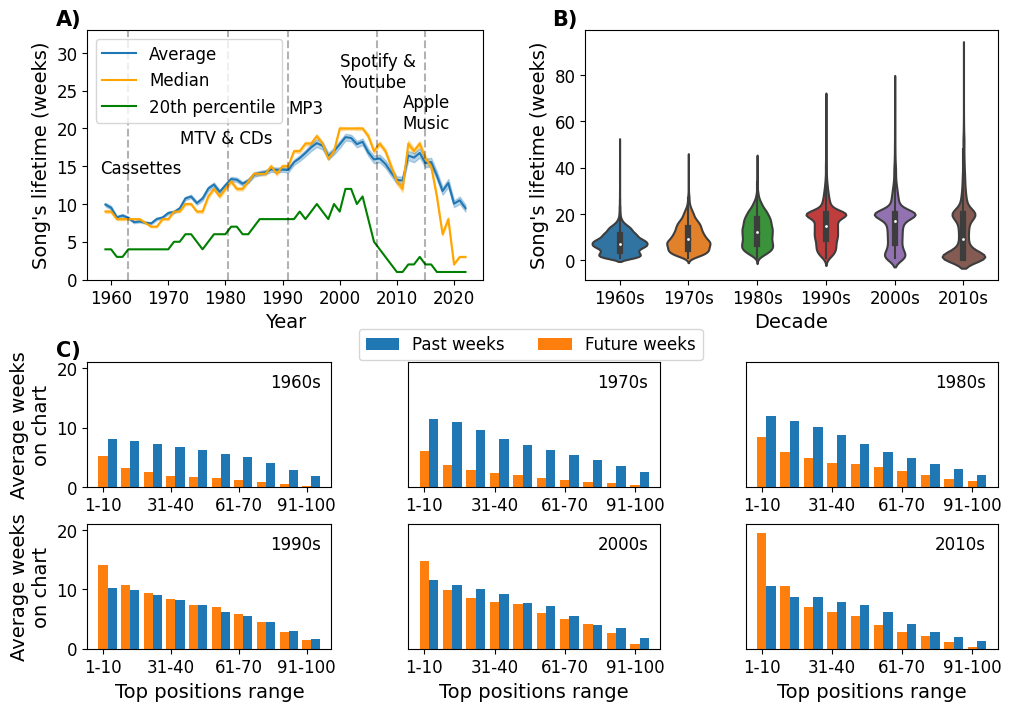

In [13]:
fig, axes = plt.subplot_mosaic([["A", "A", "A", "B", "B", "B"], ["C1", "C1", "C2", "C2", "C3", "C3"], ["C4", "C4", "C5", "C5", "C6", "C6"]], figsize=(10, 7),
    gridspec_kw={'height_ratios': [2, 1, 1], 'width_ratios': [1, 1, 1, 1, 1, 1]}, constrained_layout=True)

# Plot A
ax = axes['A']

billboard_hot_100_subset_A = billboard_hot_100[["artist", "song_name", "year", "max_weeks_on_chart"]].drop_duplicates()
avg_week_on_chart_yearly = billboard_hot_100_subset_A[["max_weeks_on_chart", "year"]].groupby(by="year").mean()
std_error = billboard_hot_100_subset_A[["year", "max_weeks_on_chart"]].groupby(by="year").sem()

median_weeks_on_chart_yearly = billboard_hot_100_subset_A[["max_weeks_on_chart", "year"]].groupby(by="year").median()
median_std_error = billboard_hot_100_subset_A[["year", "max_weeks_on_chart"]].groupby(by="year")["max_weeks_on_chart"].apply(
    std_error_of_median).rename("max_weeks_on_chart")

twntieth_weeks_on_chart_yearly = billboard_hot_100_subset_A[["max_weeks_on_chart", "year"]].groupby(by="year").quantile(0.2)

avg_week_on_chart_yearly.plot(kind='line', legend=False, ax=ax)
median_weeks_on_chart_yearly.plot(kind='line', legend=False,
    ax=ax, color="orange")
twntieth_weeks_on_chart_yearly.plot(kind='line', legend=False,
    ax=ax, color="green")

median_fill = ax.fill_between(median_weeks_on_chart_yearly.index, median_weeks_on_chart_yearly["max_weeks_on_chart"].values - median_std_error.values,
                    median_weeks_on_chart_yearly["max_weeks_on_chart"].values + median_std_error.values, alpha=0.3, color="orange")
avg_fill = ax.fill_between(avg_week_on_chart_yearly.index, avg_week_on_chart_yearly["max_weeks_on_chart"] - std_error["max_weeks_on_chart"],
                    avg_week_on_chart_yearly["max_weeks_on_chart"] + std_error["max_weeks_on_chart"], alpha=0.3, color="C0")

ax.axvline(x = youtube_creation_date.year + ((spotify_creation_date.year - youtube_creation_date.year)/2),
                                color='black', ls="dashed", alpha=0.3)
ax.axvline(x = apple_music_creation_date.year, color='black', ls="dashed", alpha=0.3)
ax.axvline(x = mtv_launch_date.year + ((mtv_launch_date.year - cds_creation_date.year)/2), color='black',
                                ls="dashed", alpha=0.3)
ax.axvline(x = mp3_creation_date.year, color='black', ls="dashed", alpha=0.3)
ax.axvline(x = cassettes_creation_date.year, color="black", ls="dashed", alpha=0.3)

ax.text(youtube_creation_date.year - 5, 25.5, "Spotify &\nYoutube")
ax.text(apple_music_creation_date.year - 4, 20, "Apple\nMusic")
ax.text(mtv_launch_date.year - 9, 18, "MTV & CDs")
ax.text(mp3_creation_date.year, 22, "MP3")
ax.text(cassettes_creation_date.year - 5, 14, "Cassettes")

ax.set_xlabel("Year")
ax.set_ylabel("Song's lifetime (weeks)")
ax.legend(["Average", "Median", "20th percentile"], loc="upper left")
ax.set_ylim([0, 33])
ax.text(-0.08, 1.02, 'A)', transform=ax.transAxes, weight='bold', fontsize=15)

# Plot B
ax = axes['B']

billboard_hot_100_subset_B = billboard_hot_100[["artist", "song_name", "decade", "max_weeks_on_chart"]].drop_duplicates()
sns.violinplot(x='decade', y="max_weeks_on_chart", order=[str(decade) + "s" for decade in range(1960, 2020, 10)], data=billboard_hot_100_subset_B, ax=ax)

ax.set_xlabel("Decade")
ax.set_ylabel("Song's lifetime (weeks)")
ax.text(-0.08, 1.02, 'B)', transform=ax.transAxes, weight='bold', fontsize=15)

# Plot C
col_i = 0

for year in range(1960, 2020, 10):
    ax = axes[f'C{col_i + 1}']
    
    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

    # take songs only from this decade
    songs_in_decade = billboard_hot_100[~(billboard_hot_100["artist"].isin(songs_from_other_decades["artist"]) &\
            billboard_hot_100["song_name"].isin(songs_from_other_decades["song_name"]))]
    
    top_positions_max = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    top_positions_future = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    top_positions_past = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    for top_position in range(10, 110, 10):
        avg_max_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["max_weeks_on_chart"].first().mean()
        new_row_max = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_max_weeks}, index=[0])
        top_positions_max = pd.concat([top_positions_max, new_row_max])

        avg_future_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["future_weeks"].first().mean()
        new_row_future = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_future_weeks}, index=[0])
        top_positions_future = pd.concat([top_positions_future, new_row_future])

        avg_past_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["past_weeks"].first().mean()
        new_row_past = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_past_weeks}, index=[0])
        top_positions_past = pd.concat([top_positions_past, new_row_past])

    ind = np.arange(top_positions_max["top_positions_range"].shape[0])
    # bar_width = 0.24
    bar_width = 0.4
    ax.bar(ind + 2*bar_width, top_positions_past["avg_weeks"], bar_width, label="Past weeks")
    ax.bar(ind + bar_width, top_positions_future["avg_weeks"], bar_width, label="Future weeks")
    ax.text(0.75, 0.8, f"{year}s", transform=ax.transAxes)
    ax.set_ylim([0, 21])
    if col_i >= 3:
        ax.set_xlabel("Top positions range")
    if col_i % 3 == 0:
        ax.set_ylabel("Average weeks\non chart")
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.set_xticks(ind[::3] + bar_width, top_positions_max["top_positions_range"].tolist()[::3])
    if col_i != 0 and col_i != 3:
        ax.set_yticks([])
        ax.set_yticks([], minor=True)
        ax.yaxis.set_tick_params(labelbottom=False)

    # if col_i == 2:
    #     ax.legend(bbox_to_anchor=(1, 1.2), ncol=2)

    col_i += 1

lines_labels = [ax.get_legend_handles_labels() for ax in [axes["C1"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
legend_bbox = (0.475, 0.465, 0.1, 0.1)
fig.legend(lines, labels, ncol=2, loc='center', bbox_to_anchor=legend_bbox, bbox_transform=fig.transFigure)

axes['C1'].text(-0.13, 1.05, 'C)', transform=axes["C1"].transAxes, weight='bold', fontsize=15)

plt.savefig("fig1.pdf", format="pdf", bbox_inches='tight', dpi=300)

## Song trajectories

### Average trajectories per decade

In [14]:
import dateutil.parser

rows_to_add = []

for year in range(1960, 2020, 10):
    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]
    
    songs_in_decade = billboard_hot_100[(billboard_hot_100["year"] >= year) &\
        (billboard_hot_100["year"] < year + 10) & ~((billboard_hot_100["artist"].isin(songs_from_other_decades["artist"]) &\
            billboard_hot_100["song_name"].isin(songs_from_other_decades["song_name"])))][["artist", "song_name", "weeks_on_chart",
                "position", "first_day_of_the_week", "year", "top_position"]]
    grouped = songs_in_decade.groupby(["artist", "song_name"])

    min_first_week = songs_in_decade["first_day_of_the_week"].min().to_pydatetime()

    for name, group in grouped:
        max_week = group["first_day_of_the_week"].max().to_pydatetime()

        for row_index, row in group.iterrows():
            if row["first_day_of_the_week"] == max_week:
                week_date = row["first_day_of_the_week"] + timedelta(weeks=1)

                while week_date < dateutil.parser.parse(f"{year + 9}-12-31"):
                    rows_to_add.append({
                        "artist": row["artist"],
                        "song_name": row["song_name"],
                        "weeks_on_chart": row["weeks_on_chart"],
                        "position": 101,
                        "first_day_of_the_week": week_date,
                        "year": week_date.year,
                        "top_position": row["top_position"]
                    })
                    week_date += timedelta(weeks=1)

billboard_100_with_empty_weeks = pd.concat([billboard_hot_100[["artist", "song_name",
    "weeks_on_chart", "position", "first_day_of_the_week", "year", "top_position"]], pd.DataFrame(rows_to_add)], ignore_index=True)

billboard_100_with_empty_weeks["first_week"] = billboard_100_with_empty_weeks.groupby(["artist", "song_name"])["first_day_of_the_week"].transform("min")

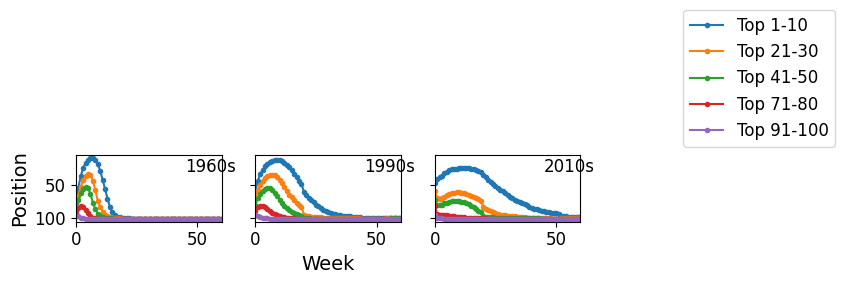

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=True, sharex=True)

col_i = 0

for year in [1960, 1990, 2010]:
    # all songs in the decade
    all_songs_in_decade = billboard_100_with_empty_weeks[(billboard_100_with_empty_weeks["year"] >= year) &\
        (billboard_100_with_empty_weeks["year"] < year + 10)][["artist", "song_name", "first_day_of_the_week", "top_position", "position",
            "first_week"]]

    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

    for top_position, low_positions in [(1, 10),  (21, 30), (41, 50), (71, 80), (91, 100)]:
        # songs that reached top 50 in the decade
        top_x_positions_in_decade = all_songs_in_decade[(all_songs_in_decade["top_position"] <= low_positions) &\
            (all_songs_in_decade["top_position"] >= top_position)][["artist", "song_name"]]

        # take songs only from this decade
        top_x_positions_in_decade = top_x_positions_in_decade[~(top_x_positions_in_decade["artist"].isin(songs_from_other_decades["artist"]) &\
            top_x_positions_in_decade["song_name"].isin(songs_from_other_decades["song_name"]))]

        # take all positions of the songs
        top_x_positions_in_decade = top_x_positions_in_decade[["artist", "song_name"]].drop_duplicates().merge(
            billboard_100_with_empty_weeks[["artist", "song_name",
                "position", "first_day_of_the_week", "first_week"]], on=["artist", "song_name"], how="left")

        min_first_week = top_x_positions_in_decade["first_day_of_the_week"].min().to_pydatetime()

        top_x_positions_in_decade["first_day_of_the_week"] = top_x_positions_in_decade.apply(lambda row:
            int(((min_first_week + timedelta(
                    days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

        top_x_positions_in_decade.set_index("first_day_of_the_week", inplace=True)
        top_x_positions_in_decade.sort_index(inplace=True)

        axes[col_i].plot(top_x_positions_in_decade.groupby("first_day_of_the_week")["position"].mean(),
            marker='o', label=f"Top {top_position}-{low_positions}", ms=3)

    axes[col_i].text(45, 30, f"{year}s")
    if col_i == 1:
        axes[ col_i].set_xlabel("Week")
    if col_i == 0:
        axes[col_i].set_ylabel("Position")
    if col_i == 2:
        axes[col_i].legend(bbox_to_anchor=(1.65, 1))
    axes[col_i].set_xlim([0, 60])

    col_i += 1

fig.tight_layout()
plt.gca().invert_yaxis()
plt.show()

### Archtypes

In [16]:
from tqdm import tqdm
from datetime import datetime, timedelta
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from pandas.plotting import table

In [17]:
billboard_hot_100["max_weeks_on_chart"] = billboard_hot_100.groupby(["artist", "song_name"])["weeks_on_chart"].transform("max")

billboard_hot_100["first_position"] = billboard_hot_100.sort_values(
    by="first_day_of_the_week").groupby(["artist", "song_name"])["position", "first_day_of_the_week"].transform("first")["position"]
billboard_hot_100["last_position"] = billboard_hot_100.sort_values(
    by="first_day_of_the_week").groupby(["artist", "song_name"])["position", "first_day_of_the_week"].transform("last")["position"]

billboard_hot_100_copy = billboard_hot_100.copy()
billboard_hot_100_ml = billboard_hot_100.groupby(
    ["artist", "song_name"])["past_weeks", "top_position", "future_weeks", "max_weeks_on_chart", "year", "first_position", "last_position"].first().reset_index()

C:\Users\cutie\AppData\Local\Temp\ipykernel_2144\1094692428.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  billboard_hot_100["first_position"] = billboard_hot_100.sort_values(
C:\Users\cutie\AppData\Local\Temp\ipykernel_2144\1094692428.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  billboard_hot_100["last_position"] = billboard_hot_100.sort_values(
C:\Users\cutie\AppData\Local\Temp\ipykernel_2144\1094692428.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  billboard_hot_100_ml = billboard_hot_100.groupby(


In [18]:
features = ["past_weeks", "top_position", "future_weeks", "max_weeks_on_chart", "first_position", "last_position"]

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(billboard_hot_100_ml[features])

model = KMeans(n_clusters=5, n_init="auto", random_state=1)
model.fit(X)

y_clusters = model.predict(X)

billboard_hot_100_ml["cluster"] = y_clusters
billboard_hot_100_new = billboard_hot_100_ml[["artist", "song_name", "cluster"]].merge(billboard_hot_100_copy, on=["artist", "song_name"], how="left")

from numpy import unique

unique_clusters = unique(y_clusters)

In [20]:
# classify clusters
cluster_statistics = {}

for cluster in unique_clusters:
    songs_from_cluster = billboard_hot_100_new[billboard_hot_100_new['cluster'] == cluster].copy()
    cluster_statistics[cluster] = songs_from_cluster[["weeks_on_chart", "past_weeks", "future_weeks", "first_position", "last_position", "top_position"]].describe()

brief_cluster = np.argmin([cluster_statistics[i].loc['75%'].loc["weeks_on_chart"] for i in unique_clusters])
start_high_cluster = np.argmin([cluster_statistics[i].loc['75%'].loc["first_position"] for i in unique_clusters])
end_high_cluster = np.argmin([cluster_statistics[i].loc['75%'].loc["last_position"] + cluster_statistics[i].loc['75%'].loc["future_weeks"] for i in unique_clusters])
normal_cluster = np.argmax([cluster_statistics[i].loc['75%'].loc["last_position"] + cluster_statistics[i].loc['75%'].loc["weeks_on_chart"] for i in unique_clusters])
longlasting_cluster = np.argmax([cluster_statistics[i].loc['75%'].loc["weeks_on_chart"] for i in unique_clusters])
print("Brief " + str(brief_cluster))
print("High-start " + str(start_high_cluster))
print("High-end " + str(end_high_cluster))
print("Normal " + str(normal_cluster))
print("Long-lasting " + str(longlasting_cluster))

Brief 4
High-start 1
High-end 2
Normal 0
Long-lasting 3


In [21]:
def map_cluster_name(cluster_nr):
    if cluster_nr == brief_cluster:
        return "Brief"
    if cluster_nr == start_high_cluster:
        return "High-start"
    if cluster_nr == end_high_cluster:
        return "High-end"
    if cluster_nr == normal_cluster:
        return "Climbing"
    return "Long-lasting"

billboard_hot_100_new["cluster"] = billboard_hot_100_new["cluster"].map(lambda x: map_cluster_name(x))

In [22]:
rows_to_add = []

grouped = billboard_hot_100_new.groupby(["artist", "song_name"])

for name, group in tqdm(grouped):
    max_week = group["first_day_of_the_week"].max()

    for row_index, row in group.iterrows():
        if row["first_day_of_the_week"] == max_week:
            week = row["first_day_of_the_week"] + timedelta(weeks=1)

            while week <= (max_week + timedelta(weeks=50)):
                rows_to_add.append({
                    "artist": row["artist"],
                    "song_name": row["song_name"],
                    "weeks_on_chart": row["weeks_on_chart"],
                    "position": 101,
                    "first_day_of_the_week": week,
                    "top_position": row["top_position"],
                    "first_position": row["first_position"],
                    "last_position": row["last_position"],
                    "past_weeks": row["past_weeks"],
                    "future_weeks": row["future_weeks"],
                    "max_weeks_on_chart": row["max_weeks_on_chart"],
                    "cluster": row["cluster"],
                    "year": row["year"]
                })
                week += timedelta(weeks=1)

billboard_100_with_empty_weeks_ml = pd.concat([billboard_hot_100_new[["artist", "song_name",
    "weeks_on_chart", "position", "first_day_of_the_week", "top_position",
    "first_position", "last_position", "past_weeks", "future_weeks",
    "max_weeks_on_chart", "cluster", "year"]], pd.DataFrame(rows_to_add)], ignore_index=True)
billboard_100_with_empty_weeks_ml["first_week"] = billboard_100_with_empty_weeks_ml.groupby(["artist", "song_name"])["first_day_of_the_week"].transform("min")

100%|██████████| 30147/30147 [03:44<00:00, 134.43it/s]


100%|██████████| 5/5 [00:47<00:00,  9.41s/it]


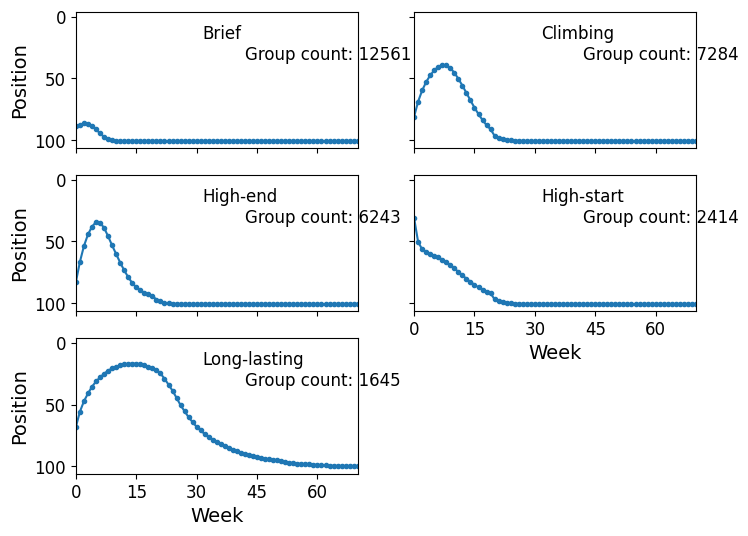

In [23]:
fig, axes = plt.subplots(math.ceil(len(unique_clusters)/2), 2, figsize=(8, 6), sharex=True, sharey=True)
row_i, col_i = 0, 0
unique_clusters = unique(billboard_100_with_empty_weeks_ml['cluster'])

for cluster in tqdm(unique_clusters):
    songs_from_cluster = billboard_100_with_empty_weeks_ml[billboard_100_with_empty_weeks_ml['cluster'] == cluster].copy()
        
    min_first_week = songs_from_cluster["first_day_of_the_week"].min().to_pydatetime()
    songs_from_cluster["first_day_of_the_week"] = songs_from_cluster.apply(lambda row:
        int(((min_first_week + timedelta(
                days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

    songs_from_cluster.set_index("first_day_of_the_week", inplace=True)
    songs_from_cluster.sort_index(inplace=True)

    axes[row_i, col_i].plot(songs_from_cluster.groupby("first_day_of_the_week")["position"].mean(),
            marker='o', ms=3)
    number_of_songs = songs_from_cluster[["artist", "song_name"]].drop_duplicates().shape[0]
    axes[row_i, col_i].text(0.6, 0.65, f"Group count: {number_of_songs}", transform=axes[row_i, col_i].transAxes)
        
    axes[row_i, col_i].text(0.45, 0.8, f"{cluster}", transform=axes[row_i, col_i].transAxes)
    if row_i == 2 or ((row_i == 1) and (col_i == 1)):
        axes[row_i, col_i].set_xlabel("Week")
        axes[row_i, col_i].xaxis.set_tick_params(labelbottom=True)
        axes[row_i, col_i].xaxis.set_major_locator(plt.MaxNLocator(6))
        for tk in axes[row_i, col_i].get_xticklabels():
                tk.set_visible(True)

    if col_i == 0:
        axes[row_i, col_i].set_ylabel("Position")

    col_i += 1
    if col_i == 2:
        col_i = 0
        row_i += 1

fig.delaxes(axes[2, 1])
plt.xlim(0, 70)
plt.gca().invert_yaxis()
plt.show()

### Archetypes over time

<Figure size 600x400 with 0 Axes>

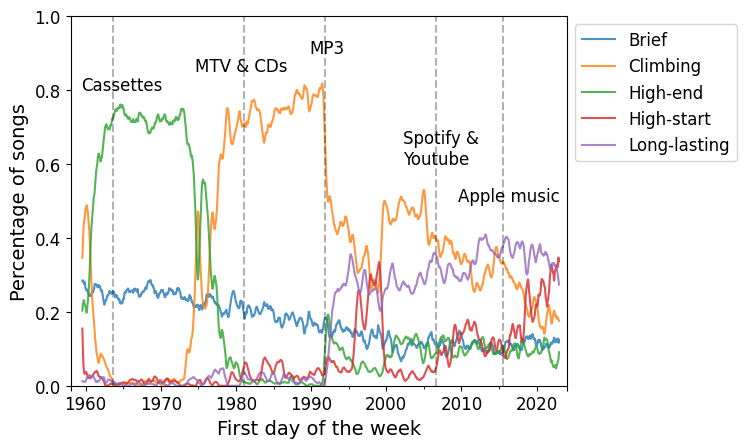

In [24]:
plt.figure(figsize=(6, 4))

billboard_hot_100_new_full_data = billboard_hot_100_new
billboard_hot_100_new_full_data.groupby(["first_day_of_the_week"])["cluster"].value_counts(
    normalize=True).unstack(fill_value=0).stack().sort_index().unstack().rolling(window=30).mean().plot(alpha=0.8)

plt.axvline(x = youtube_creation_date + timedelta(days=(spotify_creation_date - youtube_creation_date).days/2),
                                color='black', ls="dashed", alpha=0.3)
plt.axvline(x = apple_music_creation_date, color='black', ls="dashed", alpha=0.3)
plt.axvline(x = mtv_launch_date + timedelta(days=(mtv_launch_date - cds_creation_date).days/2), color='black',
                                ls="dashed", alpha=0.3)
plt.axvline(x = mp3_creation_date, color='black', ls="dashed", alpha=0.3)
plt.axvline(x = cassettes_creation_date, color="black", ls="dashed", alpha=0.3)

plt.text(youtube_creation_date - timedelta(weeks=150), 0.6, "Spotify &\nYoutube")
plt.text(apple_music_creation_date - timedelta(weeks=310), 0.5, "Apple music")
plt.text(mtv_launch_date - timedelta(weeks=370), 0.85, "MTV & CDs")
plt.text(mp3_creation_date - timedelta(weeks=110), 0.9, "MP3")
plt.text(cassettes_creation_date - timedelta(weeks=220), 0.8, "Cassettes")

plt.ylabel("Percentage of songs")
plt.xlabel("First day of the week")
plt.xlim(datetime(1958, 1, 1), datetime(2024, 1, 1))
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Plotted together

100%|██████████| 5/5 [00:47<00:00,  9.53s/it]
C:\Users\cutie\AppData\Local\Temp\ipykernel_2144\4105527738.py:160: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("fig2.pdf", format="pdf", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Local\Temp\ipykernel_2144\4105527738.py:160: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("fig2.pdf", format="pdf", bbox_inches='tight', dpi=300)
c:\Users\cutie\source\repos\mgr\env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


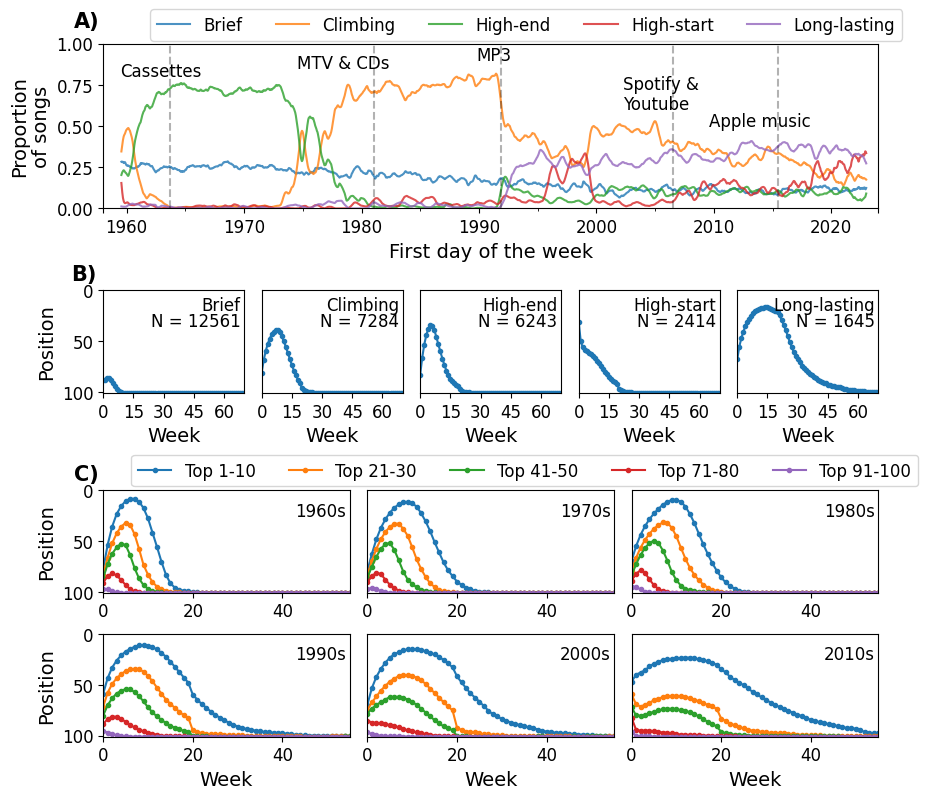

In [25]:
fig, axes = plt.subplot_mosaic([["A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A"],
                                [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
                                ["B1", "B1", "B1", "B2", "B2", "B2", "B3", "B3", "B3", "B4", "B4", "B4", "B5", "B5", "B5"],
                                [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
                                ["C1", "C1", "C1", "C1", "C1", "C2", "C2", "C2", "C2", "C2", "C3", "C3", "C3", "C3", "C3"],
                                ["C4", "C4", "C4", "C4", "C4", "C5", "C5", "C5", "C5", "C5", "C6", "C6", "C6", "C6", "C6"]], figsize=(10, 9),
    gridspec_kw={'height_ratios': [1.6, 0.001, 1, 0.15, 1, 1], 'width_ratios': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 'wspace': 0.5, 'hspace': 0.5}, constrained_layout=True)

# Plot A

ax = axes['A']

billboard_hot_100_new_full_data = billboard_hot_100_new
billboard_hot_100_new_full_data.groupby(["first_day_of_the_week"])["cluster"].value_counts(
    normalize=True).unstack(fill_value=0).stack().sort_index().unstack().rolling(window=30).mean().plot(alpha=0.8, ax=ax, legend=False).set(xlabel=None)

ax.axvline(x = youtube_creation_date + timedelta(days=(spotify_creation_date - youtube_creation_date).days/2),
                                color='black', ls="dashed", alpha=0.3)
ax.axvline(x = apple_music_creation_date, color='black', ls="dashed", alpha=0.3)
ax.axvline(x = mtv_launch_date + timedelta(days=(mtv_launch_date - cds_creation_date).days/2), color='black',
                                ls="dashed", alpha=0.3)
ax.axvline(x = mp3_creation_date, color='black', ls="dashed", alpha=0.3)
ax.axvline(x = cassettes_creation_date, color="black", ls="dashed", alpha=0.3)

ax.text(youtube_creation_date - timedelta(weeks=150), 0.6, "Spotify &\nYoutube")
ax.text(apple_music_creation_date - timedelta(weeks=310), 0.5, "Apple music")
ax.text(mtv_launch_date - timedelta(weeks=370), 0.85, "MTV & CDs")
ax.text(mp3_creation_date - timedelta(weeks=110), 0.9, "MP3")
ax.text(cassettes_creation_date - timedelta(weeks=220), 0.8, "Cassettes")

ax.set_ylabel("Proportion\nof songs")
ax.set_xlabel("First day of the week")
ax.set_xlim(datetime(1958, 1, 1), datetime(2024, 1, 1))
ax.set_ylim(0, 1)
ax.legend(loc='upper left', bbox_to_anchor=(0.05, 1.26), ncol=5)

axes['A'].text(-0.038, 1.1, 'A)', transform=axes['A'].transAxes, weight='bold', fontsize=15)

# Plot B

col_i = 0
unique_clusters = unique(billboard_100_with_empty_weeks_ml['cluster'])

for cluster in tqdm(unique_clusters):
    ax = axes[f'B{col_i + 1}']
    songs_from_cluster = billboard_100_with_empty_weeks_ml[billboard_100_with_empty_weeks_ml['cluster'] == cluster].copy()
        
    min_first_week = songs_from_cluster["first_day_of_the_week"].min().to_pydatetime()
    songs_from_cluster["first_day_of_the_week"] = songs_from_cluster.apply(lambda row:
        int(((min_first_week + timedelta(
                days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

    songs_from_cluster.set_index("first_day_of_the_week", inplace=True)
    songs_from_cluster.sort_index(inplace=True)

    ax.plot(songs_from_cluster.groupby("first_day_of_the_week")["position"].mean(),
            marker='o', ms=3)
    number_of_songs = songs_from_cluster[["artist", "song_name"]].drop_duplicates().shape[0]
    ax.text(0.975, 0.65, f"N = {number_of_songs}", transform=ax.transAxes, horizontalalignment='right')

    ax.text(0.975, 0.8, f"{cluster}", transform=ax.transAxes, horizontalalignment='right')
    ax.set_xlabel("Week")
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    for tk in ax.get_xticklabels():
        tk.set_visible(True)

    if col_i == 0:
        ax.set_ylabel("Position")
    
    if col_i != 0:
        ax.set_yticks([])
        ax.set_yticks([], minor=True)
        ax.yaxis.set_tick_params(labelbottom=False)

    ax.set_xlim(0, 70)
    ax.set_ylim([0, 101])
    ax.set_ylim(ax.get_ylim()[::-1])

    if col_i != 0:
        ax.yaxis.set_tick_params(labelleft=False)
    else:
        ax.yaxis.set_tick_params(labelleft=True)
    col_i += 1

axes['B1'].text(-0.23, 1.1, 'B)', transform=axes['B1'].transAxes, weight='bold', fontsize=15)

# Plot C

col_i = 0

for year in range(1960, 2020, 10):
    ax = axes[f'C{col_i + 1}']
    # all songs in the decade
    all_songs_in_decade = billboard_100_with_empty_weeks[(billboard_100_with_empty_weeks["year"] >= year) &\
        (billboard_100_with_empty_weeks["year"] < year + 10)][["artist", "song_name", "first_day_of_the_week", "top_position", "position",
            "first_week"]]

    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

    for top_position, low_positions in [(1, 10),  (21, 30), (41, 50), (71, 80), (91, 100)]:
        # songs that reached top 50 in the decade
        top_x_positions_in_decade = all_songs_in_decade[(all_songs_in_decade["top_position"] <= low_positions) &\
            (all_songs_in_decade["top_position"] >= top_position)][["artist", "song_name"]]

        # take songs only from this decade
        top_x_positions_in_decade = top_x_positions_in_decade[~(top_x_positions_in_decade["artist"].isin(songs_from_other_decades["artist"]) &\
            top_x_positions_in_decade["song_name"].isin(songs_from_other_decades["song_name"]))]

        # take all positions of the songs
        top_x_positions_in_decade = top_x_positions_in_decade[["artist", "song_name"]].drop_duplicates().merge(
            billboard_100_with_empty_weeks[["artist", "song_name",
                "position", "first_day_of_the_week", "first_week"]], on=["artist", "song_name"], how="left")

        min_first_week = top_x_positions_in_decade["first_day_of_the_week"].min().to_pydatetime()

        top_x_positions_in_decade["first_day_of_the_week"] = top_x_positions_in_decade.apply(lambda row:
            int(((min_first_week + timedelta(
                    days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

        top_x_positions_in_decade.set_index("first_day_of_the_week", inplace=True)
        top_x_positions_in_decade.sort_index(inplace=True)

        ax.plot(top_x_positions_in_decade.groupby("first_day_of_the_week")["position"].mean(),
            marker='o', label=f"Top {top_position}-{low_positions}", ms=3)

    ax.text(0.78, 0.75, f"{year}s", transform=ax.transAxes)
    if col_i >= 3:
        ax.set_xlabel("Week")
    if col_i % 3 == 0:
        ax.set_ylabel("Position")

    ax.set_xlim([0, 55])
    ax.set_ylim([0, 101])
    ax.set_ylim(ax.get_ylim()[::-1])

    if col_i != 0 and col_i != 3:
        ax.set_yticks([])
        ax.set_yticks([], minor=True)
        ax.yaxis.set_tick_params(labelbottom=False)
    
    if col_i <= 2:
        ax.set_title(' ')
    if col_i == 0:
        ax.legend(loc='upper left', bbox_to_anchor=(0.08, 1.42), ncol=5)
        #fig.legend(lines, labels, ncol=5, loc='center', bbox_to_anchor=legend_bbox, bbox_transform=fig.transFigure)

    col_i += 1

# lines_labels = [ax.get_legend_handles_labels() for ax in [axes["C1"]]]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# legend_bbox = (0.465, 0.205, 0.1, 0.1)
# fig.legend(lines, labels, ncol=5, loc='center', bbox_to_anchor=legend_bbox, bbox_transform=fig.transFigure)

axes['C1'].text(-0.12, 1.1, 'C)', transform=axes['C1'].transAxes, weight='bold', fontsize=15)

plt.savefig("fig2.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.show()

## Songs movement changes

### Proportion of small jumps

In [26]:
def calculate_position_difference(position, last_week_position):
    if np.isnan(last_week_position):
        return np.NaN
    return last_week_position - position

billboard_hot_100["position_change"] = billboard_hot_100.apply(
    lambda x: calculate_position_difference(x["position"], x["last_week_position"]), axis=1)

In [27]:
billboard_hot_100["diffusion_jump"] = billboard_hot_100["position_change"] < 10

In [28]:
# https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def moving_average(x, w):
    return np.convolve(x, np.ones(w) / w, 'valid')

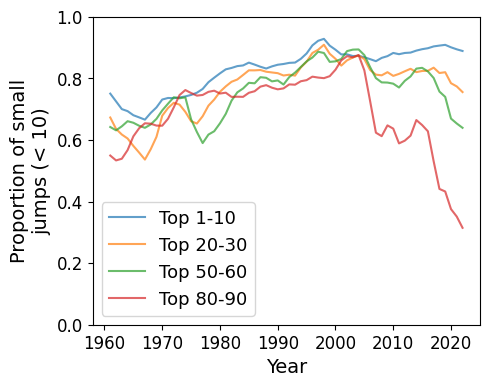

In [29]:
plt.figure(figsize=(5, 4))

diffusion_jumps_top_10 = []
diffusion_jumps_top_20_30 = []
diffusion_jumps_top_50_60 = []
diffusion_jumps_top_80_90 = []
for year in range(1959, 2023):
    songs_from_year = billboard_hot_100[billboard_hot_100["year"] == year]
    diffusion_jumps_top_10.append(songs_from_year[songs_from_year["top_position"] <= 10]["diffusion_jump"].mean())
    diffusion_jumps_top_20_30.append(songs_from_year[(songs_from_year["top_position"] > 20) & (songs_from_year["top_position"] <= 30)]["diffusion_jump"].mean())
    diffusion_jumps_top_50_60.append(songs_from_year[(songs_from_year["top_position"] > 50) & (songs_from_year["top_position"] <= 60)]["diffusion_jump"].mean())
    diffusion_jumps_top_80_90.append(songs_from_year[(songs_from_year["top_position"] > 80) & (songs_from_year["top_position"] <= 90)]["diffusion_jump"].mean())

plt.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_10, 3), label="Top 1-10", alpha=0.7)
plt.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_20_30, 3), label="Top 20-30", alpha=0.7)
plt.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_50_60, 3), label="Top 50-60", alpha=0.7)
plt.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_80_90, 3), label="Top 80-90", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Proportion of small\njumps (< 10)")
plt.ylim([0, 1])
plt.legend(fontsize=13, loc="lower left")
plt.show()

### Histogram of position change

In [30]:
import matplotlib.patches as patches

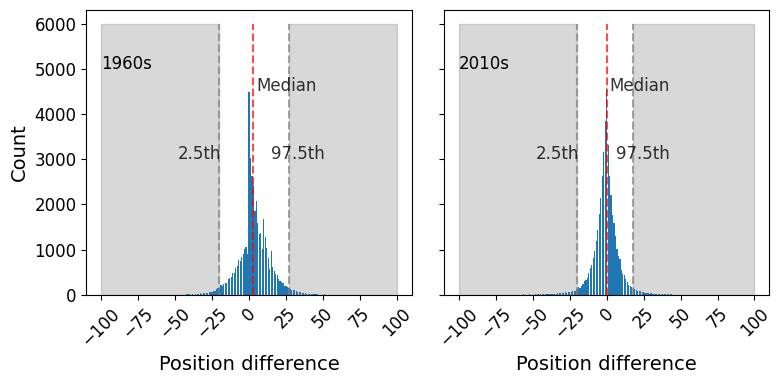

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

col = 0

billboard_subset = billboard_hot_100[["year", "first_day_of_the_week", "position_change"]]

for year in [1960, 2010]:
    decade_subset = billboard_subset[(billboard_subset["year"] >= year) &\
        (billboard_subset["year"] < year + 10)]["position_change"]
    count_changes = decade_subset.value_counts().sort_index()

    perecentile_25 = decade_subset.quantile(0.025)
    perecentile_975 = decade_subset.quantile(0.975)
    perecentile_50 = decade_subset.quantile(0.5)

    axes[col].vlines(perecentile_25, ymin=0, ymax=6000, color="grey", linestyle='--', alpha=0.7)
    axes[col].vlines(perecentile_975, ymin=0, ymax=6000, color="grey", linestyle='--', alpha=0.7)
    axes[col].vlines(perecentile_50, ymin=0, ymax=6000, color="red", linestyle='--', alpha=0.7)
    
    # mark the percentiles 
    rect_left = patches.Rectangle((-100, 0), 100 + perecentile_25, 6000, linewidth=1, edgecolor='grey', facecolor='grey', alpha=0.3)
    axes[col].add_patch(rect_left)
    axes[col].text(perecentile_25 - 28, 3000, "2.5th", size=12, alpha = 0.8)
    rect_right = patches.Rectangle((perecentile_975, 0), 100 - perecentile_975, 6000, linewidth=1, edgecolor='grey', facecolor='grey', alpha=0.3)
    axes[col].add_patch(rect_right)
    axes[col].text(perecentile_975 - 12, 3000, "97.5th", size=12, alpha = 0.8)

    axes[col].text(perecentile_50 + 2, 4500, "Median", size=12, alpha = 0.8)
    axes[col].bar(count_changes.index, count_changes.values)

    axes[col].text(-100, 5000, f"{year}s")

    axes[col].set_xlabel("Position difference")
    if col == 0:
        axes[col].set_ylabel("Count")
    else:
        axes[col].set_ylabel(None)
    
    axes[col].xaxis.set_major_locator(plt.MaxNLocator(10))
    for tick in axes[col].get_xticklabels():
        tick.set_rotation(45)

    col += 1

plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=10)
fig.tight_layout()
plt.show()

### Features

In [32]:
years = range(1959, 2022)

  0%|          | 0/63 [00:00<?, ?it/s]

100%|██████████| 63/63 [00:00<00:00, 214.06it/s]


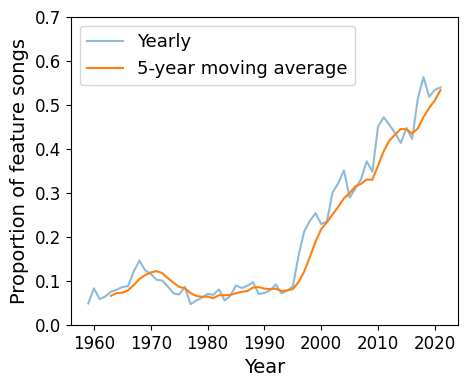

In [33]:
plt.figure(figsize=(5, 4))

percentages = []

for year in tqdm(years):
    artists_from_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist"]].drop_duplicates()
    artists_features = artists_from_year[(artists_from_year["artist"].str.lower().str.contains("featuring")) |\
        (artists_from_year["artist"].str.lower().str.contains("&"))]
    percentage_of_new_features = len(artists_features)/len(artists_from_year)
    percentages.append(percentage_of_new_features)

plt.plot(years, percentages, alpha=0.5)
plt.plot(years[4:], moving_average(percentages, 5))

plt.xlabel("Year")
plt.ylim([0, 0.7])
plt.ylabel("Proportion of feature songs")
plt.legend(["Yearly", "5-year moving average"], loc="upper left", fontsize=13)
plt.show()

### New artists

100%|██████████| 63/63 [00:30<00:00,  2.06it/s]


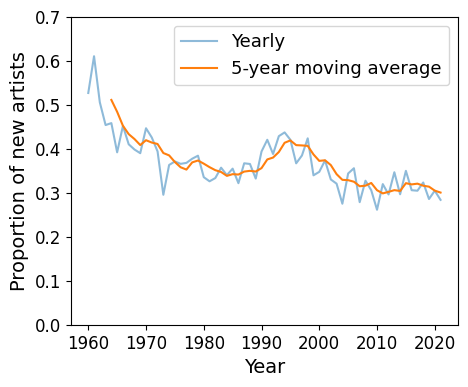

In [34]:
plt.figure(figsize=(5, 4))

percentages = []
first_week = billboard_hot_100["first_day_of_the_week"].min() + timedelta(weeks=1)
last_week = billboard_hot_100["first_day_of_the_week"].max()

for year in tqdm(years):
    artists_from_year = billboard_hot_100[(billboard_hot_100["year"] == year) &\
        ~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))][["artist"]].drop_duplicates()
    artists_from_previous_years = billboard_hot_100[billboard_hot_100["year"] < year]["artist"].drop_duplicates()
    new_artists = artists_from_year[~artists_from_year["artist"].isin(artists_from_previous_years)]
    percentage_of_new_artists = len(new_artists)/len(artists_from_year)
    percentages.append(percentage_of_new_artists)

plt.plot(years[1:], percentages[1:], alpha=0.5)
plt.plot(years[5:], moving_average(percentages[1:], 5))

plt.xlabel("Year")
plt.ylabel("Proportion of new artists")
plt.ylim([0, 0.7])
plt.legend(["Yearly", "5-year moving average"], loc="upper right", fontsize=13)
plt.show()

### Proportion of artists with X songs

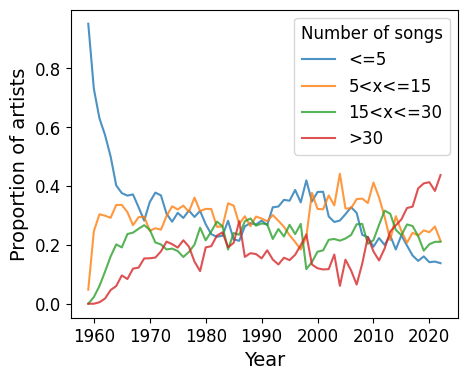

In [35]:
plt.figure(figsize=(5, 4))

df = billboard_hot_100[~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))]
songs_numbers_count = df[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages_5_less = []
averages_3 = []
averages_5 = []
averages_10 = []

for year in range(1959, 2023):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_from_this_year = songs_until_year[songs_until_year["year"] == year]["artist"]
    numbers_of_songs = songs_until_year[songs_until_year["artist"].isin(songs_from_this_year)].copy()
    numbers_of_songs["less_than_5"] = (numbers_of_songs["total_number_of_songs"] <= 5)
    numbers_of_songs["more_than_3_songs"] = (numbers_of_songs["total_number_of_songs"] > 5) & (numbers_of_songs["total_number_of_songs"] <= 15)
    numbers_of_songs["more_than_5_songs"] = (numbers_of_songs["total_number_of_songs"] > 15) & (numbers_of_songs["total_number_of_songs"] <= 30)
    numbers_of_songs["more_than_10_songs"] = numbers_of_songs["total_number_of_songs"] > 30
    averages_3.append(numbers_of_songs["more_than_3_songs"].mean())
    averages_5.append(numbers_of_songs["more_than_5_songs"].mean())
    averages_10.append(numbers_of_songs["more_than_10_songs"].mean())
    averages_5_less.append(numbers_of_songs["less_than_5"].mean())
    
plt.plot(range(1959, 2023), averages_5_less, alpha=0.8)
plt.plot(range(1959, 2023), averages_3, alpha=0.8)
plt.plot(range(1959, 2023), averages_5, alpha=0.8)
plt.plot(range(1959, 2023), averages_10, alpha=0.8)
plt.xlabel("Year")
plt.ylabel("Proportion of artists")
legend = plt.legend(["<=5", "5<x<=15", "15<x<=30", ">30"], title="Number of songs", fontsize=12, bbox_to_anchor=(1, 1))
legend.get_title().set_fontsize('12')
plt.show()

### Skewness

In [36]:
from scipy import stats

def fisher_skewness(distribution):    return stats.skew(distribution)

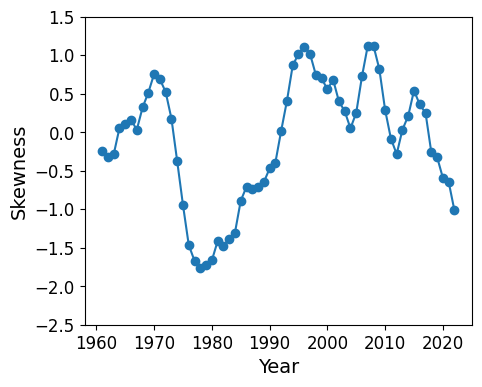

In [37]:
plt.figure(figsize=(5, 4))

fisher_skewness_distributions = []

for year in range(1959, 2023):
    year_subset = billboard_subset[billboard_subset["year"] == year]["position_change"].dropna()
    fisher_skweness = fisher_skewness(year_subset.values)
    fisher_skewness_distributions.append(fisher_skweness)

plt.plot(range(1961, 2023), moving_average(fisher_skewness_distributions, 3), marker="o")

plt.xlabel("Year")
plt.ylabel("Skewness")

plt.ylim(-2.5, 1.5)
plt.show()

In [38]:
def bhattacharyya_coefficient(distribution1, distribution2):
    dist1, dist2 = distribution1.align(distribution2, fill_value=0)
    distribution1_normalized = dist1 / np.sum(dist1)
    distribution2_normalized = dist2 / np.sum(dist2)
    return sum(math.sqrt(x * y) for x, y in zip(distribution1_normalized, distribution2_normalized))

In [39]:
distributions_normalized = {}
distributions = {}

billboard_subset = billboard_hot_100[["year", "first_day_of_the_week", "position_change"]]

for year in range(1959, 2023):
    year_subset = billboard_subset[billboard_subset["year"] == year]["position_change"]
    count_changes = year_subset.value_counts().sort_index()
    distributions[year] = count_changes
    distributions_normalized[year] = count_changes / count_changes.sum()

In [40]:
dist1, dist2 = distributions[1970], distributions[2019]
dist1.values, dist2.values
bhattacharyya_coefficient(dist1, dist2)

0.9332764897300178

In [41]:
dist1.head(60), dist2.head(60)

(-35.0      1
 -29.0      1
 -27.0      1
 -26.0      2
 -25.0      2
 -24.0      2
 -23.0      1
 -22.0      2
 -21.0      4
 -20.0     12
 -19.0      6
 -18.0      7
 -17.0     14
 -16.0     15
 -15.0     30
 -14.0     32
 -13.0     26
 -12.0     22
 -11.0     36
 -10.0     43
 -9.0      49
 -8.0      45
 -7.0      68
 -6.0      71
 -5.0      81
 -4.0      82
 -3.0      96
 -2.0     130
 -1.0     140
  0.0     561
  1.0     424
  2.0     348
  3.0     288
  4.0     231
  5.0     208
  6.0     182
  7.0     144
  8.0     150
  9.0     138
  10.0    116
  11.0     85
  12.0     74
  13.0     62
  14.0     65
  15.0     62
  16.0     42
  17.0     41
  18.0     35
  19.0     31
  20.0     31
  21.0     23
  22.0     29
  23.0     24
  24.0     17
  25.0     21
  26.0      8
  27.0     14
  28.0      8
  29.0      6
  30.0      9
 Name: position_change, dtype: int64,
 -73.0      2
 -72.0      1
 -67.0      1
 -64.0      1
 -56.0      1
 -51.0      1
 -49.0      1
 -48.0      2
 -47.0    

### Together

c:\Users\cutie\source\repos\mgr\env\Lib\site-packages\seaborn\utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
C:\Users\cutie\AppData\Local\Temp\ipykernel_2144\3691529961.py:127: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("fig3.pdf", format="pdf", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Local\Temp\ipykernel_2144\3691529961.py:127: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("fig3.pdf", format="pdf", bbox_inches='tight', dpi=300)
c:\Users\cutie\source\repos\mgr\env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smal

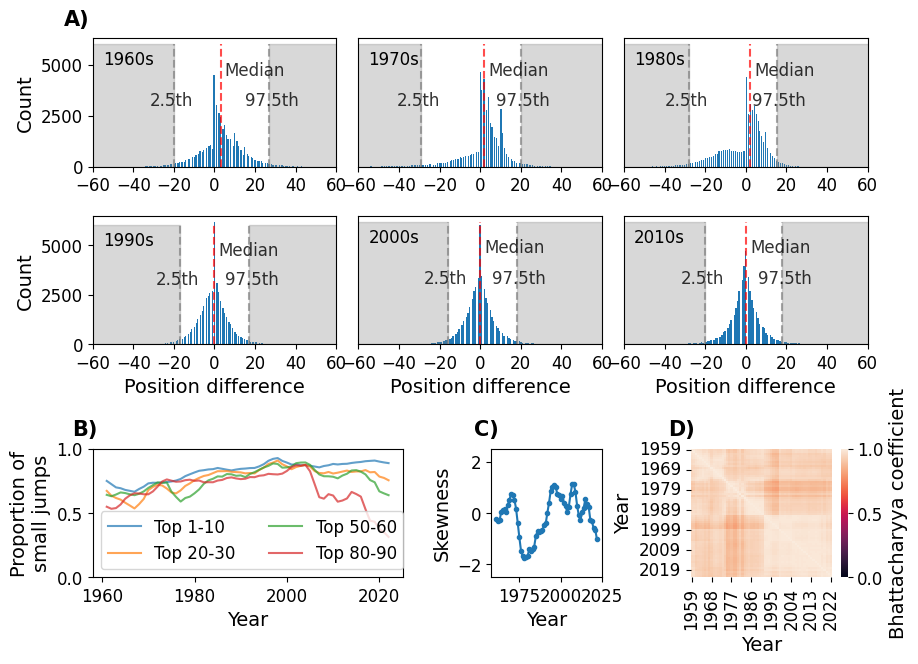

In [42]:
fig, axes = plt.subplot_mosaic([["A1", "A1", "A1", "A1", "A2", "A2", "A2", "A2", "A3", "A3", "A3", "A3"],
                                ["A4", "A4", "A4", "A4", "A5", "A5", "A5", "A5", "A6", "A6", "A6", "A6"],
                                [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
                                ["B", "B", "B", "B", "B", ".", "C", "C", ".", "D", "D", "D"]], figsize=(10, 7),
    gridspec_kw={'height_ratios': [1, 1, 0.05, 1], 'width_ratios': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 'wspace': 0.5, 'hspace': 0.5}, constrained_layout=True)

# Plot A

col = 0

billboard_subset = billboard_hot_100[["year", "first_day_of_the_week", "position_change"]]

for year in range(1960, 2020, 10):
    ax = axes[f"A{col + 1}"]
    decade_subset = billboard_subset[(billboard_subset["year"] >= year) &\
        (billboard_subset["year"] < year + 10)]["position_change"]
    num_bins = int(np.sqrt(len(decade_subset)))
    ax.hist(decade_subset, bins=num_bins)
    
    count_changes = decade_subset.value_counts().sort_index()

    perecentile_25 = decade_subset.quantile(0.025)
    perecentile_975 = decade_subset.quantile(0.975)
    perecentile_50 = decade_subset.quantile(0.5)

    ax.vlines(perecentile_25, ymin=0, ymax=6000, color="grey", linestyle='--', alpha=0.7)
    ax.vlines(perecentile_975, ymin=0, ymax=6000, color="grey", linestyle='--', alpha=0.7)
    ax.vlines(perecentile_50, ymin=0, ymax=6000, color="red", linestyle='--', alpha=0.7)
    
    # mark the percentiles 
    rect_left = patches.Rectangle((-100, 0), 100 + perecentile_25, 6000, linewidth=1, edgecolor='grey', facecolor='grey', alpha=0.3)
    ax.add_patch(rect_left)
    ax.text(perecentile_25 - 12, 3000, "2.5th", alpha = 0.8)
    rect_right = patches.Rectangle((perecentile_975, 0), 100 - perecentile_975, 6000, linewidth=1, edgecolor='grey', facecolor='grey', alpha=0.3)
    ax.add_patch(rect_right)
    ax.text(perecentile_975 - 12, 3000, "97.5th", alpha = 0.8)

    ax.text(perecentile_50 + 2, 4500, "Median", alpha = 0.8)
    # ax.bar(count_changes.index, count_changes.values)

    ax.text(-55, 5000, f"{year}s")

    if col >= 3:
        ax.set_xlabel("Position difference")
    if col % 3 == 0:
        ax.set_ylabel("Count")
    else:
        ax.set_ylabel(None)
    
    ax.set_xlim(-60, 60)
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.locator_params(axis='x', nbins=6)

    if col != 0 and col != 3:
        ax.set_yticks([])
        ax.set_yticks([], minor=True)
        ax.yaxis.set_tick_params(labelbottom=False)


    col += 1

axes['A1'].text(-0.12, 1.1, 'A)', transform=axes['A1'].transAxes, weight='bold', fontsize=15)

# Plot B

ax = axes["B"]

diffusion_jumps_top_10 = []
diffusion_jumps_top_20_30 = []
diffusion_jumps_top_50_60 = []
diffusion_jumps_top_80_90 = []
for year in range(1959, 2023):
    songs_from_year = billboard_hot_100[billboard_hot_100["year"] == year]
    diffusion_jumps_top_10.append(songs_from_year[songs_from_year["top_position"] <= 10]["diffusion_jump"].mean())
    diffusion_jumps_top_20_30.append(songs_from_year[(songs_from_year["top_position"] > 20) & (songs_from_year["top_position"] <= 30)]["diffusion_jump"].mean())
    diffusion_jumps_top_50_60.append(songs_from_year[(songs_from_year["top_position"] > 50) & (songs_from_year["top_position"] <= 60)]["diffusion_jump"].mean())
    diffusion_jumps_top_80_90.append(songs_from_year[(songs_from_year["top_position"] > 80) & (songs_from_year["top_position"] <= 90)]["diffusion_jump"].mean())

ax.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_10, 3), label="Top 1-10", alpha=0.7)
ax.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_20_30, 3), label="Top 20-30", alpha=0.7)
ax.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_50_60, 3), label="Top 50-60", alpha=0.7)
ax.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_80_90, 3), label="Top 80-90", alpha=0.7)
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of\nsmall jumps")
ax.set_ylim([0, 1])
ax.legend(loc="lower left", ncol=2)

axes['B'].text(-0.065, 1.1, 'B)', transform=axes['B'].transAxes, weight='bold', fontsize=15)

# lines_labels = [ax.get_legend_handles_labels() for ax in [axes["B"]]]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# legend_bbox = (0.3, 0.19, 0.1, 0.1)
# fig.legend(lines, labels, ncol=2, loc='center', bbox_to_anchor=legend_bbox, bbox_transform=fig.transFigure)

# Plot C

ax = axes["C"]
ax.plot(range(1961, 2023), moving_average(fisher_skewness_distributions, 3), marker="o", ms=3)

ax.set_xlabel("Year")
ax.set_ylabel("Skewness")

ax.set_ylim(-2.5, 2.5)

axes['C'].text(-0.16, 1.1, 'C)', transform=axes['C'].transAxes, weight='bold', fontsize=15)

# Plot D
ax = axes['D']

coefficients_bhattacharyya = {}

for year_1 in range(1959, 2023):
    for year_2 in range(1959, 2023):
        if year_1 not in coefficients_bhattacharyya:
            coefficients_bhattacharyya[year_1] = {}
        coefficients_bhattacharyya[year_1][year_2] = bhattacharyya_coefficient(
            distributions[year_1], distributions[year_2])

sns.heatmap(pd.DataFrame.from_dict(coefficients_bhattacharyya), ax=ax, vmax=1, vmin=0,
                             cbar_kws={'label': 'Bhattacharyya coefficient'})
ax.set_xlabel("Year")
ax.set_ylabel("Year")

axes['D'].text(-0.16, 1.1, 'D)', transform=axes['D'].transAxes, weight='bold', fontsize=15)

plt.savefig("fig3.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.show()

## Hitmakers

### Distribution of number of songs

In [43]:
number_of_songs = billboard_hot_100[["artist", "song_name"]].drop_duplicates().groupby("artist")["song_name"].count().reset_index(name="song_count")
billboard_hot_100["number_of_songs"] = billboard_hot_100["artist"].map(lambda artist: number_of_songs[number_of_songs["artist"] == artist]["song_count"].iloc[0])

In [44]:
numbers_of_songs = billboard_hot_100[["artist", "number_of_songs"]].drop_duplicates()
count_numbers_of_songs = numbers_of_songs["number_of_songs"].value_counts().sort_index()

In [45]:
top_4_artists = numbers_of_songs[numbers_of_songs["number_of_songs"] > 30].sort_values("number_of_songs", ascending=False).head(4)

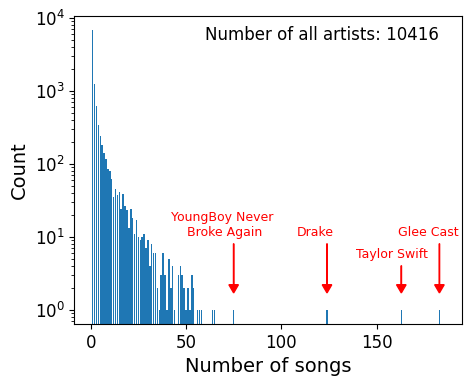

In [46]:
plt.figure(figsize=(5, 4))

plt.bar(count_numbers_of_songs.index, count_numbers_of_songs.values)
nartists = billboard_hot_100["artist"].nunique()
plt.text(60, 5000, f"Number of all artists: {nartists}", fontsize=12)

for i, (_, top_artist)in enumerate(top_4_artists.iterrows()):
    number_of_songs = top_artist["number_of_songs"]
    if i != 1:
        artist_text = top_artist["artist"]
        if len(top_artist["artist"]) > 15:
            artist_text = top_artist["artist"][:15] + "\n" + top_artist["artist"][15:]
            plt.text(number_of_songs - 5, 23, artist_text, fontsize=9, color="red", va="top", ha="center")
        else:
            plt.text(number_of_songs - 6, 14, artist_text, fontsize=9, color="red", va="top", ha="center")
        plt.arrow(number_of_songs, 8, 0, -5.8, width=0.2, head_width=5, head_length=0.5, color="red")
    else:
        plt.arrow(number_of_songs, 4, 0, -1.8, width=0.2, head_width=5, head_length=0.5, color="red")
        plt.text(number_of_songs - 5, 7, top_artist["artist"], fontsize=9, color="red", va="top", ha="center")

plt.xlabel("Number of songs")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

### Proportion of songs by hitmakers

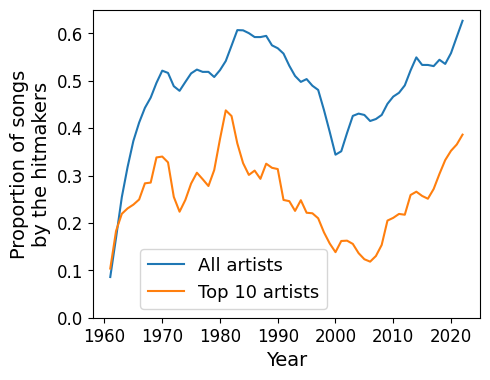

In [47]:
plt.figure(figsize=(5, 4))

songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages = []
averages_10 = []
medians = []

for year in range(1959, 2023):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_from_this_year = songs_until_year[songs_until_year["year"] == year]["artist"]
    numbers_of_songs = songs_until_year[songs_until_year["artist"].isin(songs_from_this_year)].drop_duplicates().copy()
    numbers_of_songs["hitmaker"] = numbers_of_songs["total_number_of_songs"] > 10
    averages.append(numbers_of_songs["hitmaker"].mean())

    hitmakers = numbers_of_songs[numbers_of_songs["hitmaker"] == True]["artist"]
    songs_data_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", "year", "top_position"]].drop_duplicates().copy()
    songs_data_from_this_year = songs_data_from_this_year[songs_data_from_this_year["top_position"] <= 10]
    songs_data_from_this_year["hitmaker"] = songs_data_from_this_year["artist"].isin(hitmakers)
    songs_data_from_this_year = songs_data_from_this_year[["hitmaker", "artist"]].drop_duplicates()
    averages_10.append(songs_data_from_this_year["hitmaker"].mean())
    
plt.plot(range(1959, 2023)[2:], moving_average(averages, 3))
plt.plot(range(1959, 2023)[2:], moving_average(averages_10, 3))
plt.xlabel("Year")
plt.ylabel("Proportion of songs\nby the hitmakers")
plt.legend(["All artists", "Top 10 artists"], loc="lower left", bbox_to_anchor=(0.1, 0), fontsize=13)
plt.ylim([0, 0.65])
plt.show()

### Positions for artists from different decades

In [48]:
popular_artists = ["The Beatles", "Elton John", "Madonna", "Taylor Swift", "Drake", "Beyonce"]

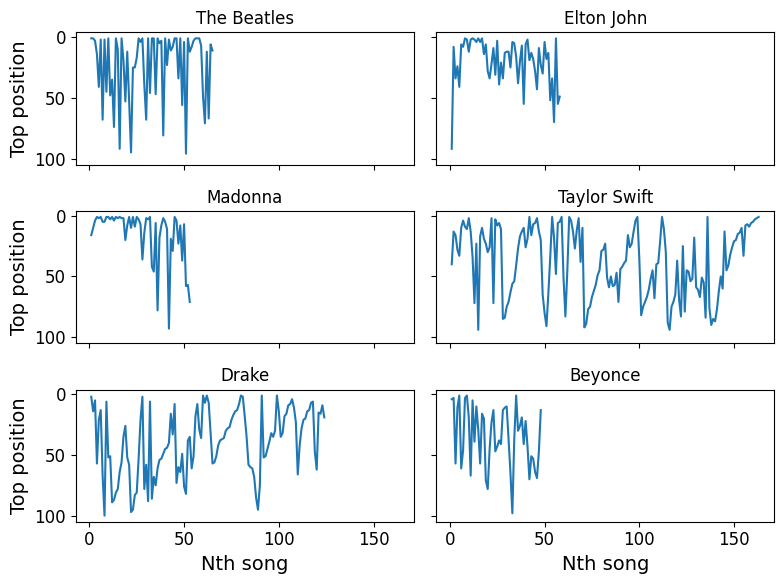

In [49]:
distinct_artist_songs = billboard_hot_100.sort_values(by="first_day_of_the_week")[[
    "artist", "song_name", "top_position", "year"]].drop_duplicates()

fig, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True, sharey=True)
row_i, col_i = 0, 0

for artist in popular_artists:
    hitmakers_top_positions = billboard_hot_100[billboard_hot_100["artist"] == artist][["top_position", "song_name", "first_day_of_the_week"]].sort_values(by="first_day_of_the_week")[["top_position", "song_name"]].drop_duplicates()
    hitmakers_top_positions = hitmakers_top_positions["top_position"]
    axes[row_i, col_i].plot(range(1, len(hitmakers_top_positions) + 1), hitmakers_top_positions, color="C0")
    if row_i == 2:
        axes[row_i, col_i].set_xlabel("Nth song")
    if col_i == 0:
        axes[row_i, col_i].set_ylabel("Top position")
    axes[row_i, col_i].set_title(f"{artist}", fontsize=12)

    col_i += 1
    if col_i == 2:
        row_i += 1
        col_i = 0

fig.tight_layout()
plt.gca().invert_yaxis()
plt.show()

### Together

100%|██████████| 63/63 [01:17<00:00,  1.23s/it]
C:\Users\cutie\AppData\Local\Temp\ipykernel_2144\3675021241.py:228: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("fig4.pdf", format="pdf", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Local\Temp\ipykernel_2144\3675021241.py:228: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("fig4.pdf", format="pdf", bbox_inches='tight', dpi=300)
c:\Users\cutie\source\repos\mgr\env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


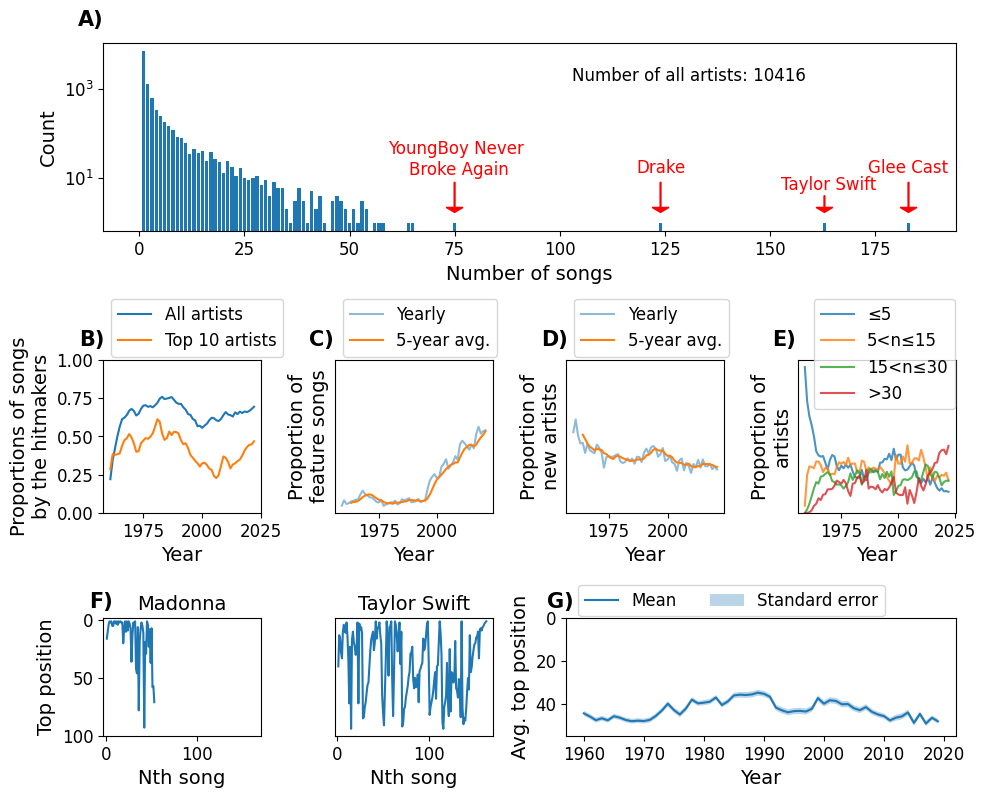

In [52]:
fig, axes = plt.subplot_mosaic([["A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A"],
                                [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
                                ["B", "B", "B", "C", "C", "C", "D", "D", "D", "E", "E", "E"],
                                [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
                                ["F1", "F1", "F1", "F2", "F2", "F2", "G", "G", "G", "G", "G", "G"]], figsize=(11, 9),
    gridspec_kw={'height_ratios': [1.6, 0.25, 1.3, 0.05, 1], 'width_ratios': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                'wspace': 20, 'hspace': 0.5}, constrained_layout=True)

# Plot A

ax = axes["A"]

ax.bar(count_numbers_of_songs.index, count_numbers_of_songs.values)
nartists = billboard_hot_100["artist"].nunique()
ax.text(0.55, 0.8, f"Number of all artists: {nartists}", transform=ax.transAxes)

for i, (_, top_artist) in enumerate(top_4_artists.iterrows()):
    number_of_songs = top_artist["number_of_songs"]
    if i != 1:
        artist_text = top_artist["artist"]
        if len(top_artist["artist"]) > 15:
            artist_text = top_artist["artist"][:15] + "\n" + top_artist["artist"][15:]
            ax.text(number_of_songs + 1, 70, artist_text, color="red", va="top", ha="center")
        else:
            ax.text(number_of_songs, 27, artist_text, color="red", va="top", ha="center")
        ax.arrow(number_of_songs, 8, 0, -5.8, width=0.2, head_width=4, head_length=0.5, color="red")
    else:
        ax.arrow(number_of_songs, 4, 0, -1.8, width=0.2, head_width=4, head_length=0.5, color="red")
        ax.text(number_of_songs + 1, 11, top_artist["artist"], color="red", va="top", ha="center")

ax.set_xlabel("Number of songs")
ax.set_ylabel("Count")
ax.set_yscale("log")

axes['A'].text(-0.03, 1.09, 'A)', transform=axes['A'].transAxes, weight='bold', fontsize=15)

# Plot B

ax = axes["B"]

songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages = []
averages_10 = []
medians = []

for year in range(1959, 2023):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_from_this_year = songs_until_year[songs_until_year["year"] == year]["artist"]
    numbers_of_songs = songs_until_year[songs_until_year["artist"].isin(songs_from_this_year)].drop_duplicates().copy()
    numbers_of_songs["hitmaker"] = numbers_of_songs["total_number_of_songs"] > 10
    averages.append(numbers_of_songs["hitmaker"].mean())

    hitmakers = numbers_of_songs[numbers_of_songs["hitmaker"] == True]["artist"]
    songs_data_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", "year", "top_position"]].drop_duplicates().copy()
    songs_data_from_this_year = songs_data_from_this_year[songs_data_from_this_year["top_position"] <= 10]
    songs_data_from_this_year["hitmaker"] = songs_data_from_this_year["artist"].isin(hitmakers)
    songs_data_from_this_year = songs_data_from_this_year[["hitmaker", "artist"]].drop_duplicates()
    averages_10.append(songs_data_from_this_year["hitmaker"].mean())
    
ax.plot(range(1959, 2023)[2:], moving_average(averages, 3))
ax.plot(range(1959, 2023)[2:], moving_average(averages_10, 3))
ax.set_xlabel("Year")
ax.set_ylabel("Proportions of songs\nby the hitmakers")
ax.legend(["All artists", "Top 10 artists"], loc="upper left", bbox_to_anchor=(0, 1.45))
ax.set_ylim([0, 1])

axes['B'].text(-0.155, 1.09, 'B)', transform=axes['B'].transAxes, weight='bold', fontsize=15)

# Plot C

ax = axes["C"]

percentages = []

for year in tqdm(years):
    artists_from_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist"]].drop_duplicates()
    artists_features = artists_from_year[(artists_from_year["artist"].str.lower().str.contains("featuring")) |\
        (artists_from_year["artist"].str.lower().str.contains("&"))]
    percentage_of_new_features = len(artists_features)/len(artists_from_year)
    percentages.append(percentage_of_new_features)

ax.plot(years, percentages, alpha=0.5)
ax.plot(years[4:], moving_average(percentages, 5))
ax.set_yticks([])
ax.set_yticks([], minor=True)
ax.yaxis.set_tick_params(labelbottom=False)

ax.set_xlabel("Year")
ax.set_ylim([0, 1])
ax.set_ylabel("Proportion of\nfeature songs")
ax.legend(["Yearly", "5-year avg."], loc="upper left", bbox_to_anchor=(0, 1.45))

axes['C'].text(-0.16, 1.09, 'C)', transform=axes['C'].transAxes, weight='bold', fontsize=15)

# Plot D

ax = axes["D"]

percentages = []
first_week = billboard_hot_100["first_day_of_the_week"].min() + timedelta(weeks=1)
last_week = billboard_hot_100["first_day_of_the_week"].max()

for year in tqdm(years):
    artists_from_year = billboard_hot_100[(billboard_hot_100["year"] == year) &\
        ~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))][["artist"]].drop_duplicates()
    artists_from_previous_years = billboard_hot_100[billboard_hot_100["year"] < year]["artist"].drop_duplicates()
    new_artists = artists_from_year[~artists_from_year["artist"].isin(artists_from_previous_years)]
    percentage_of_new_artists = len(new_artists)/len(artists_from_year)
    percentages.append(percentage_of_new_artists)

ax.plot(years[1:], percentages[1:], alpha=0.5)
ax.plot(years[5:], moving_average(percentages[1:], 5))
ax.set_yticks([])
ax.set_yticks([], minor=True)
ax.yaxis.set_tick_params(labelbottom=False)

ax.set_xlabel("Year")
ax.set_ylabel("Proportion of\nnew artists")
ax.set_ylim([0, 1])
ax.legend(["Yearly", "5-year avg."], loc="upper left", bbox_to_anchor=(0, 1.45))

axes['D'].text(-0.16, 1.09, 'D)', transform=axes['D'].transAxes, weight='bold', fontsize=15)

# Plot E

ax = axes["E"]

df = billboard_hot_100[~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))]
songs_numbers_count = df[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages_5_less = []
averages_3 = []
averages_5 = []
averages_10 = []

for year in range(1959, 2023):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_from_this_year = songs_until_year[songs_until_year["year"] == year]["artist"]
    numbers_of_songs = songs_until_year[songs_until_year["artist"].isin(songs_from_this_year)].copy()
    numbers_of_songs["less_than_5"] = (numbers_of_songs["total_number_of_songs"] <= 5)
    numbers_of_songs["more_than_3_songs"] = (numbers_of_songs["total_number_of_songs"] > 5) & (numbers_of_songs["total_number_of_songs"] <= 15)
    numbers_of_songs["more_than_5_songs"] = (numbers_of_songs["total_number_of_songs"] > 15) & (numbers_of_songs["total_number_of_songs"] <= 30)
    numbers_of_songs["more_than_10_songs"] = numbers_of_songs["total_number_of_songs"] > 30
    averages_3.append(numbers_of_songs["more_than_3_songs"].mean())
    averages_5.append(numbers_of_songs["more_than_5_songs"].mean())
    averages_10.append(numbers_of_songs["more_than_10_songs"].mean())
    averages_5_less.append(numbers_of_songs["less_than_5"].mean())
    
ax.plot(range(1959, 2023), averages_5_less, alpha=0.8)
ax.plot(range(1959, 2023), averages_3, alpha=0.8)
ax.plot(range(1959, 2023), averages_5, alpha=0.8)
ax.plot(range(1959, 2023), averages_10, alpha=0.8)
ax.set_yticks([])
ax.set_yticks([], minor=True)
ax.yaxis.set_tick_params(labelbottom=False)

ax.set_xlabel("Year")
ax.set_ylabel("Proportion of\nartists")
ax.set_ylim([0, 1])
ax.legend(["≤5", "5<n≤15", "15<n≤30", ">30"], ncol=1, loc="upper left", bbox_to_anchor=(0.05, 1.45))
#ax.legend(["<=5", "5<x<=15", "15<x<=30", ">30"], title="Number of songs", bbox_to_anchor=(1, 1))

axes['E'].text(-0.16, 1.09, 'E)', transform=axes['E'].transAxes, weight='bold', fontsize=15)

# Plot F

popular_artists = ["Madonna", "Taylor Swift"]

distinct_artist_songs = billboard_hot_100.sort_values(by="first_day_of_the_week")[[
    "artist", "song_name", "top_position", "year"]].drop_duplicates()

col_i = 0

for artist in popular_artists:
    ax = axes[f"F{col_i + 1}"]
    hitmakers_top_positions = billboard_hot_100[billboard_hot_100["artist"] == artist][["top_position", "song_name", "first_day_of_the_week"]].sort_values(by="first_day_of_the_week")[["top_position", "song_name"]].drop_duplicates()
    hitmakers_top_positions = hitmakers_top_positions["top_position"]
    ax.plot(range(1, len(hitmakers_top_positions) + 1), hitmakers_top_positions, color="C0")
    ax.set_xlabel("Nth song")
    if col_i == 0:
        ax.set_ylabel("Top position")
    ax.set_title(f"{artist}", fontsize=MEDIUM_SIZE)

    col_i += 1
    ax.set_xlim([-3, 170])
    ax.set_ylim([-2, 100])
    ax.set_ylim(ax.get_ylim()[::-1])
    if artist == "Taylor Swift":
        ax.set_yticks([])
        ax.set_yticks([], minor=True)
        ax.yaxis.set_tick_params(labelbottom=False)


axes['F1'].text(-0.09, 1.09, 'F)', transform=axes['F1'].transAxes, weight='bold', fontsize=15)

# Plot G

songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages = []
stds = []
ax = axes["G"]

for year in range(1960, 2020):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_from_this_year = songs_until_year[songs_until_year["year"] == year]["artist"]
    numbers_of_songs = songs_until_year[songs_until_year["artist"].isin(songs_from_this_year)].drop_duplicates().copy()
    numbers_of_songs["hitmaker"] = numbers_of_songs["total_number_of_songs"] > 10

    hitmakers = numbers_of_songs[numbers_of_songs["hitmaker"] == True]["artist"]
    songs_data_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", "song_name", "top_position"]].drop_duplicates().copy()
    averages.append(songs_data_from_this_year["top_position"].mean())
    stds.append(songs_data_from_this_year["top_position"].sem())

ax.plot(range(1960, 2020), averages)
ax.fill_between(range(1960, 2020), np.array(averages) - np.array(stds), np.array(averages) + np.array(stds), alpha=0.3)
ax.invert_yaxis()
ax.legend(["Mean", "Standard error"], ncol=2, loc="upper left", bbox_to_anchor=(0.01, 1.35))
ax.set_ylim([55, 0])
ax.set_xlabel("Year")
ax.set_ylabel("Avg. top position")

axes['G'].text(-0.05, 1.09, 'G)', transform=axes['G'].transAxes, weight='bold', fontsize=15)

plt.savefig("fig4.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.show()

## Hitmakers top ranks

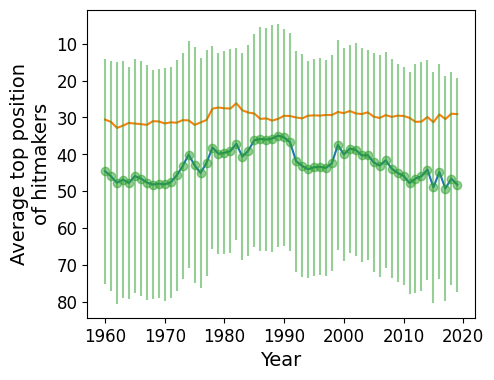

In [51]:
import statistics

songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages = []
stds = []
plt.figure(figsize=(5, 4))

for year in range(1960, 2020):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_from_this_year = songs_until_year[songs_until_year["year"] == year]["artist"]
    numbers_of_songs = songs_until_year[songs_until_year["artist"].isin(songs_from_this_year)].drop_duplicates().copy()
    numbers_of_songs["hitmaker"] = numbers_of_songs["total_number_of_songs"] > 10

    hitmakers = numbers_of_songs[numbers_of_songs["hitmaker"] == True]["artist"]
    songs_data_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", "song_name", "top_position"]].drop_duplicates().copy()
    averages.append(songs_data_from_this_year["top_position"].mean())
    stds.append(statistics.stdev(songs_data_from_this_year["top_position"]))

plt.plot(range(1960, 2020), averages)
# plt.fill_between(range(1960, 2020), np.array(averages) - np.array(stds), np.array(averages) + np.array(stds), alpha=0.3)
plt.plot(range(1960, 2020), stds)
plt.gca().invert_yaxis()
plt.errorbar(range(1960, 2020), averages, yerr=stds, fmt='o', alpha=0.5)
#plt.legend(["Mean", "Standard error"], loc="upper right")
# plt.ylim([55, 30])
plt.xlabel("Year")
plt.ylabel("Average top position\nof hitmakers")
plt.show()